# Data Understanding

Import the dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data collection

In [2]:
#read the data set and check the first 5 row
df=pd.read_csv("/content/sample_data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#get some information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data Pre-processing

Data cleaning

In [4]:
#checking missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Encoding the categorical features(Change all String or Object to Int)

In [5]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


/tmp/ipython-input-3764901712.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}}, inplace=True)
/tmp/ipython-input-3764901712.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
/tmp/ipython-input-3764901712.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.

# Exploratory Data Analysis (EDA)

In this part, I viusalize all the data and see their relationship using seaborn and matplotlib

<Figure size 600x600 with 0 Axes>

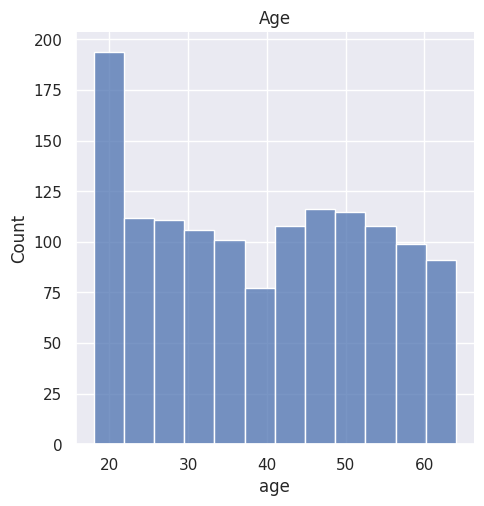

In [6]:
#age distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title("Age")
plt.show()


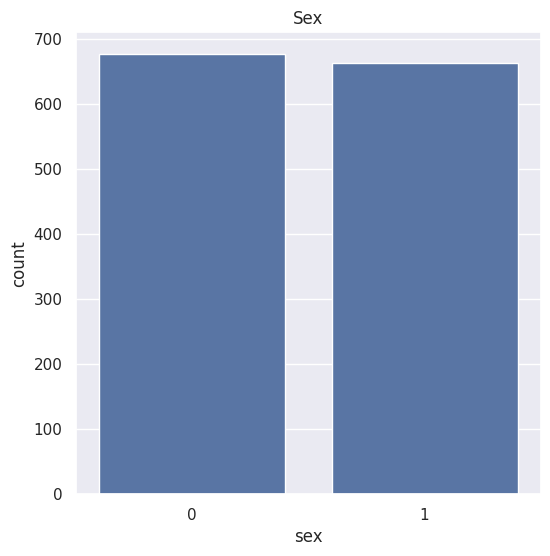

In [7]:
#sex
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title("Sex")
plt.show()

<Figure size 600x600 with 0 Axes>

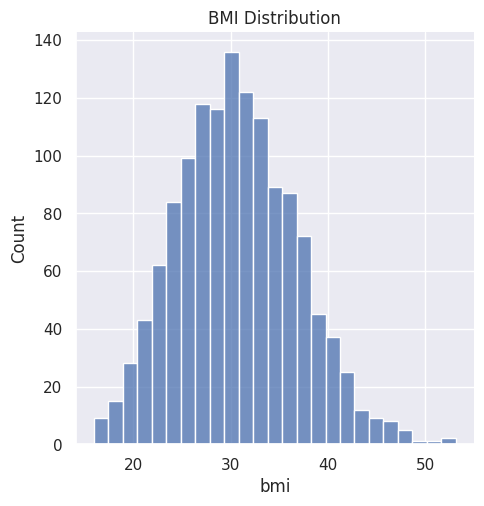

In [8]:
plt.figure(figsize=(6,6))
sns.displot(x='bmi',data=df)
plt.title("BMI Distribution")
plt.show()

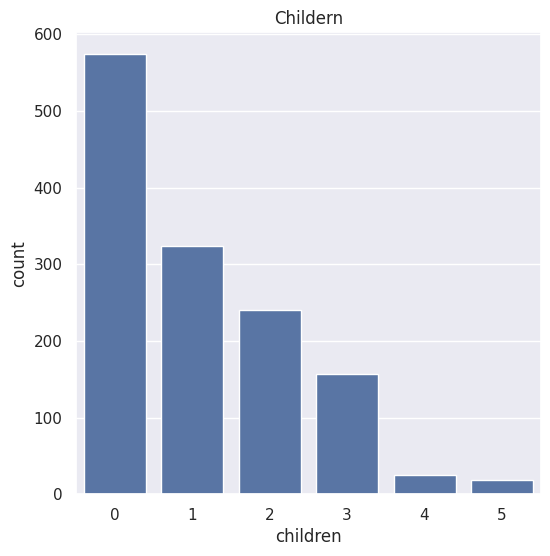

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title("Childern")
plt.show()

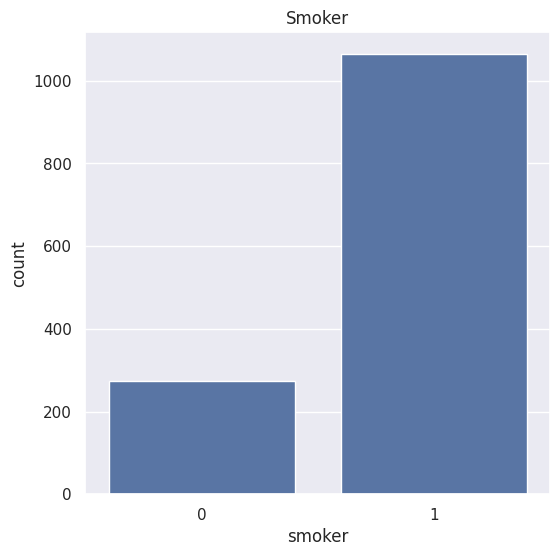

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title("Smoker")
plt.show()

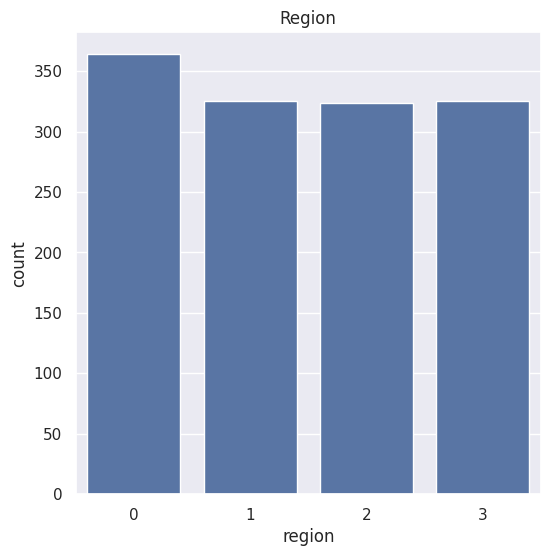

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title("Region")
plt.show()

<Figure size 600x600 with 0 Axes>

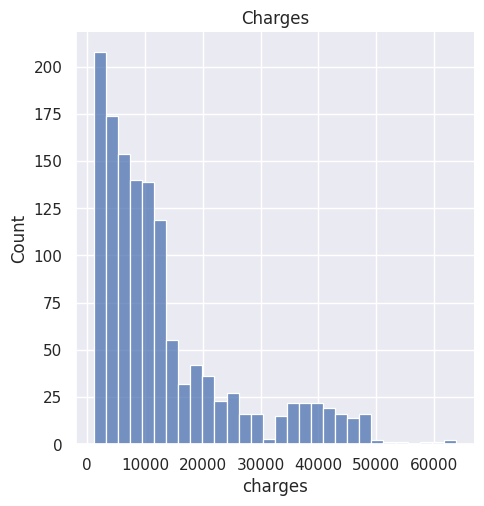

In [12]:
#Charge distribution
plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title("Charges")
plt.show()

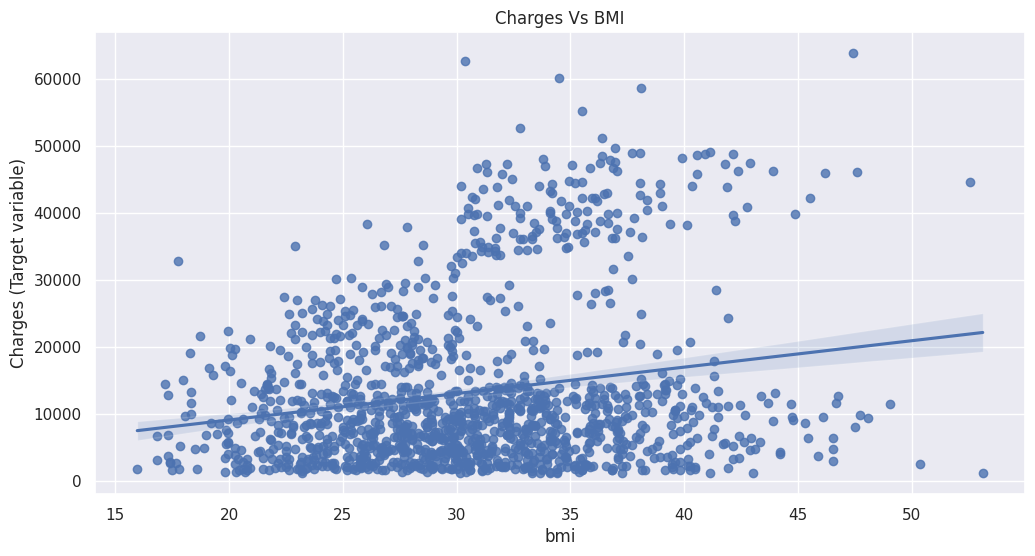

In [13]:
# Visulaize the data
plt.figure(figsize=(12,6))
sns.regplot(x='bmi',y='charges',data=df)
plt.xlabel('bmi')
plt.ylabel('Charges (Target variable)')
plt.title('Charges Vs BMI');

The regression line clearly shows a positive linear trend, suggesting that higher BMI is associated with higher medical charges.

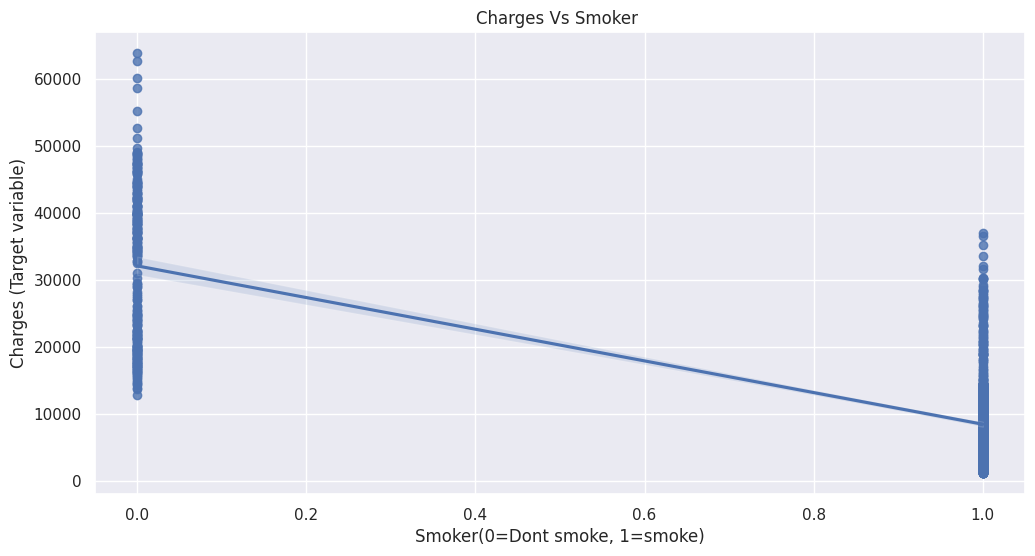

In [14]:
# Visulaize the data
plt.figure(figsize=(12,6))
sns.regplot(x='smoker',y='charges',data=df)
plt.xlabel('Smoker(0=Dont smoke, 1=smoke)')
plt.ylabel('Charges (Target variable)')
plt.title('Charges Vs Smoker ');

The regression line clearly shows a positive linear trend, suggesting that people who smoke is associated with higher medical charges.

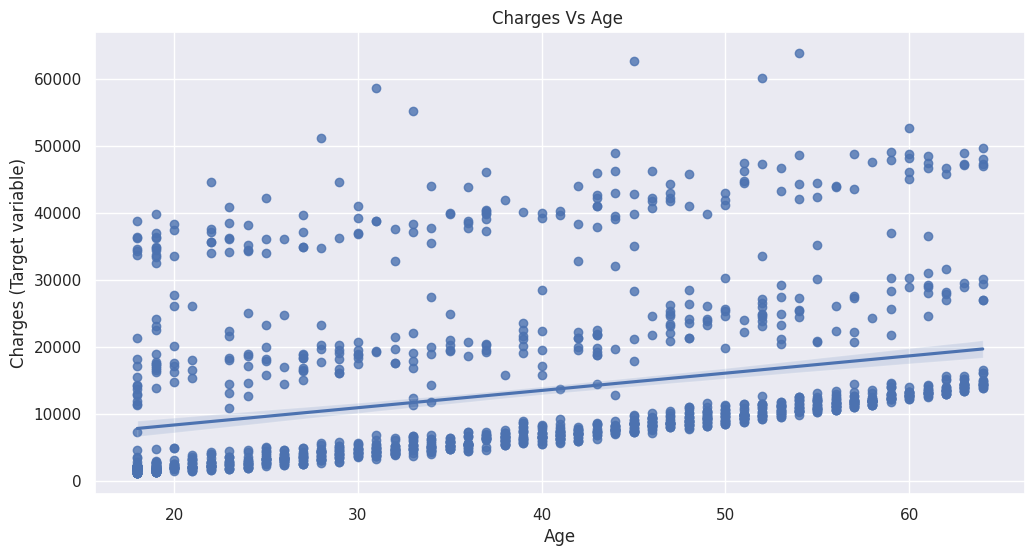

In [15]:
# Visulaize the data
plt.figure(figsize=(12,6))
sns.regplot(x='age',y='charges',data=df)
plt.xlabel('Age')
plt.ylabel('Charges (Target variable)')
plt.title('Charges Vs Age ');

The regression line clearly shows a positive linear trend, suggesting that higher age is associated with higher medical charges.

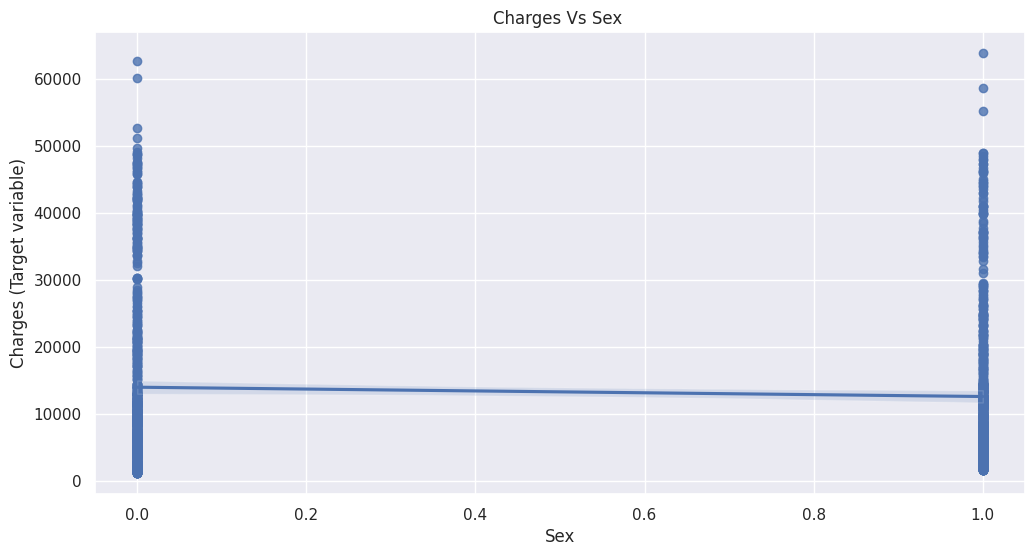

In [16]:
# Visulaize the data
plt.figure(figsize=(12,6))
sns.regplot(x='sex',y='charges',data=df)
plt.xlabel('Sex')
plt.ylabel('Charges (Target variable)')
plt.title('Charges Vs Sex ');
plt.show()

This plot demonstrates that there is a very weak or almost non-existent linear relationship between a person's sex and their insurance charges.

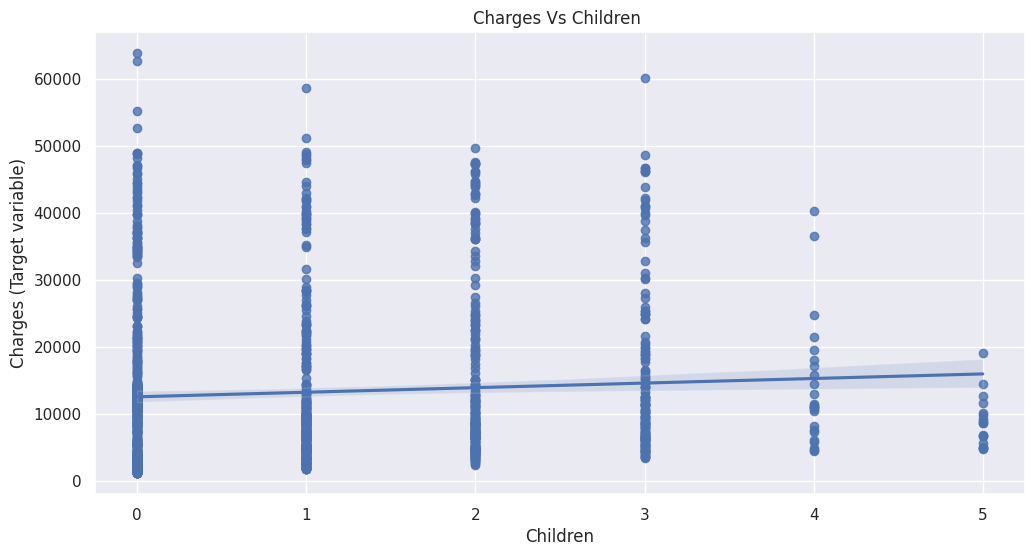

In [17]:
# Visulaize the data
plt.figure(figsize=(12,6))
sns.regplot(x='children',y='charges',data=df)
plt.xlabel('Children')
plt.ylabel('Charges (Target variable)')
plt.title('Charges Vs Children ');

This plot demonstrates that there is a very weak  linear relationship between their number of children and their insurance charges.

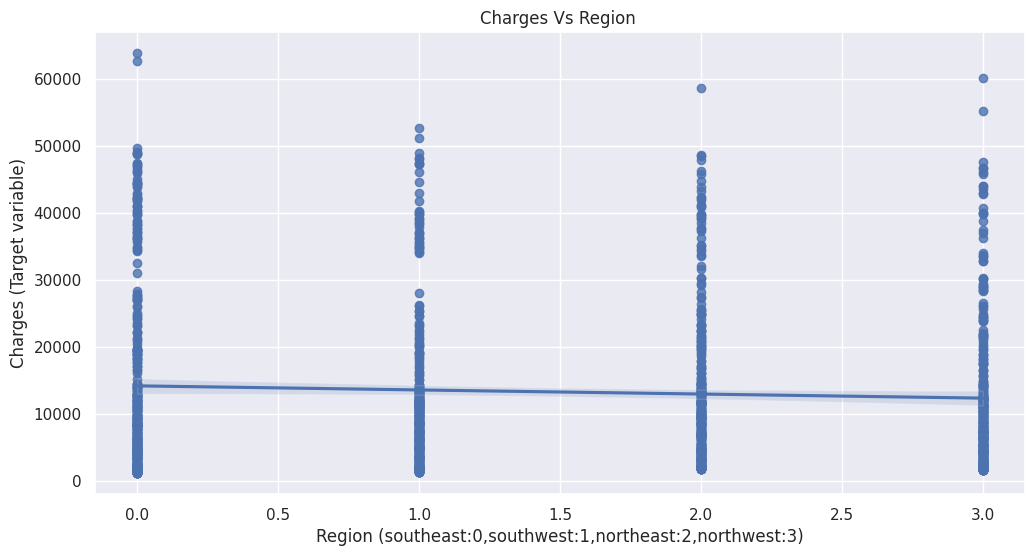

In [18]:
# Visulaize the data
plt.figure(figsize=(12,6))
sns.regplot(x='region',y='charges',data=df)
plt.xlabel('Region (southeast:0,southwest:1,northeast:2,northwest:3)')
plt.ylabel('Charges (Target variable)')
plt.title('Charges Vs Region ');

This plot demonstrates that there is a very weak or almost non-existent linear relationship between which region they lived and their insurance charges.

# Model planning and building


We select all features and the target is charges


Spliting the features and target


In [19]:
X = df.drop(columns=['charges','sex','children','region'], axis=1)
Y = df['charges']
print(X)


      age     bmi  smoker
0      19  27.900       0
1      18  33.770       1
2      28  33.000       1
3      33  22.705       1
4      32  28.880       1
...   ...     ...     ...
1333   50  30.970       1
1334   18  31.920       1
1335   18  36.850       1
1336   21  25.800       1
1337   61  29.070       0

[1338 rows x 3 columns]


Spliting the data into training data and testing data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


Model trainning

Mulitple regression

In [21]:
#Load the regression model
regressor = LinearRegression()



In [22]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model evaluation

In [23]:

# GET P-VALUES

# 1. Import the statsmodels library
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# 2. Add a constant (intercept) to our training data.
# This is a required step for statsmodels.
X_train_with_const = sm.add_constant(X_train)

# 3. Fit the Ordinary Least Squares (OLS) model from statsmodels
# We use the same Y_train and our new X_train_with_const
model_sm = sm.OLS(Y_train, X_train_with_const)
results = model_sm.fit()

# 4. Print the detailed summary, which includes the p-values
print('P values of the features: ')
print('-------------------------------')
print(results.pvalues)


P values of the features: 
-------------------------------
const      4.141792e-28
age        4.232759e-68
bmi        6.475205e-24
smoker    1.881118e-294
dtype: float64


In [24]:
#prediction on the training data
training_data_prediction = regressor.predict(X_train)
#find R squared valueof the training data
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print("R squared value of train data: ",r2_train)
#prediction on the testing data
test_data_prediction=regressor.predict(X_test)
#find R squared value of testing data
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print("R squared value of test data: ",r2_test)

R squared value of train data:  0.7477154710893205
R squared value of test data:  0.7458235577888374


In [25]:
mae = mean_absolute_error(Y_test, test_data_prediction)
print('The Mean Absolute Error is: ',mae)

The Mean Absolute Error is:  4235.618673028049


In [26]:
rmse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print('The Root Mean Squared Error (RMSE): ',rmse)

The Root Mean Squared Error (RMSE):  6178.382613401879


# Building a predictive system

In [27]:
#input a data from the dataset to test the model. Change the sex, smoker and region to number.

#Example:31,female,25.74,0,no,southeast,3756.6216
#Example:28,male,33,3,no,southeast,4449.462
#Example:62,female,26.29,0,yes,southeast,27808.7251

#{'sex':{'male':0,'female':1}}
#{'smoker':{'yes':0,'no':1}}
#{'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}
#------------------------------------------------------------------
#------------------------First Example----------------------------
#------------------------------------------------------------------
input_data = (31,25.74,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost of example 1 is  ', prediction)
#------------------------------------------------------------------
#------------------------Second Example---------------------------
#------------------------------------------------------------------
input_data2 = (28,33,1)

# changing input_data to a numpy array
input_data_as_numpy_array2 = np.asarray(input_data2)

# reshape the array
input_data_reshaped2 = input_data_as_numpy_array2.reshape(1,-1)

prediction2 = regressor.predict(input_data_reshaped2)
print(prediction2)

print('The insurance cost of example 2 is  ', prediction2)
#------------------------------------------------------------------
#------------------------Third Example----------------------------
#------------------------------------------------------------------
input_data3 = (62,26.29,0)

# changing input_data to a numpy array
input_data_as_numpy_array3 = np.asarray(input_data3)

# reshape the array
input_data_reshaped3 = input_data_as_numpy_array3.reshape(1,-1)

prediction3 = regressor.predict(input_data_reshaped3)
print(prediction3)

print('The insurance cost of example 3 is  ', prediction3)

[4745.80171372]
The insurance cost of example 1 is   [4745.80171372]
[6306.94782157]
The insurance cost of example 2 is   [6306.94782157]
[36684.70928993]
The insurance cost of example 3 is   [36684.70928993]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


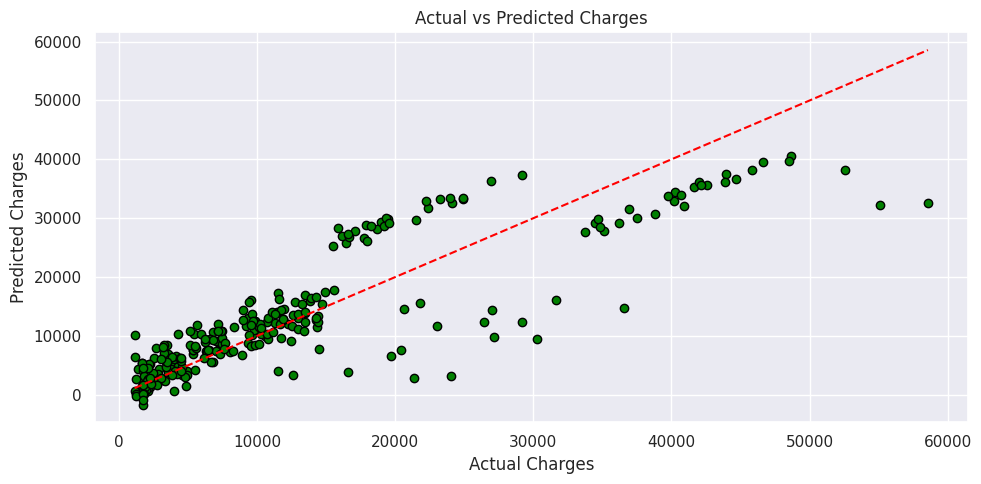

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, test_data_prediction, color="green", edgecolor="black")

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", linestyle="--")

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.grid(True)
plt.tight_layout()
plt.show()